# HOW TO USE AN API + API TEST NOTEBOOK
--------------------------------------------------------------------------------------------------------------------------------------------------------

https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest

https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest

--------------------------------------------------------------------------------------------------------------------------------------------------------


In [29]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'21',
  'convert':'EUR'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [31]:
type(data)

dict

In [33]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [35]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.EUR.price,quote.EUR.volume_24h,quote.EUR.volume_change_24h,quote.EUR.percent_change_1h,quote.EUR.percent_change_24h,quote.EUR.percent_change_7d,quote.EUR.percent_change_30d,quote.EUR.percent_change_60d,quote.EUR.percent_change_90d,quote.EUR.market_cap,quote.EUR.market_cap_dominance,quote.EUR.fully_diluted_market_cap,quote.EUR.tvl,quote.EUR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11997,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.984182e+07,1.984182e+07,False,NaN,1,NaN,NaN,None,2025-03-25T15:43:00.000Z,81314.596836,2.879950e+10,11.7703,-0.333046,-0.256231,7.303820,-8.087577,-16.727473,-10.817038,1.613429e+12,60.6792,1.707607e+12,None,2025-03-25T15:43:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 16:44:34.496530
1,1027,Ethereum,ETH,ethereum,10077,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206418e+08,1.206418e+08,True,NaN,2,NaN,NaN,None,2025-03-25T15:43:00.000Z,1916.585048,1.095511e+10,-10.7163,-0.371296,-0.659712,9.467803,-25.699522,-38.361710,-40.328701,2.312203e+11,8.6946,2.312203e+11,None,2025-03-25T15:43:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 16:44:34.496530
2,825,Tether USDt,USDT,tether,121153,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,1.437781e+11,1.458791e+11,True,NaN,3,NaN,NaN,None,2025-03-25T15:42:00.000Z,0.925243,5.457245e+10,-4.5136,-0.015900,0.007804,0.035876,0.001161,0.024753,0.108268,1.330296e+11,5.0031,1.349736e+11,None,2025-03-25T15:43:02.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-25 16:44:34.496530
3,52,XRP,XRP,xrp,1560,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.815811e+10,9.998632e+10,False,NaN,4,NaN,NaN,None,2025-03-25T15:43:00.000Z,2.258333,2.417187e+09,-17.4461,-0.434529,-1.364213,8.391548,-4.156683,-22.700494,6.937149,1.313404e+11,4.9388,2.258333e+11,None,2025-03-25T15:43:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 16:44:34.496530
4,1839,BNB,BNB,bnb,2411,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424727e+08,1.424727e+08,False,NaN,5,NaN,NaN,None,2025-03-25T15:43:00.000Z,586.786402,2.164633e+09,43.3737,-0.091493,1.038767,0.656537,-2.559297,-7.361212,-9.976553,8.360102e+10,3.1436,8.360102e+10,None,2025-03-25T15:43:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 16:44:34.496530
5,5426,Solana,SOL,solana,856,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.113395e+08,5.969380e+08,True,NaN,6,NaN,NaN,None,2025-03-25T15:43:00.000Z,134.249071,3.176679e+09,-10.0296,-1.315535,1.560568,17.996541,-13.300121,-44.727325,-26.573854,6.864685e+10,2.5817,8.013837e+10,None,2025-03-25T15:43:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 16:44:34.496530
6,3408,USDC,USDC,usd-coin,26478,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.973659e+10,5.973659e+10,False,NaN,7,NaN,NaN,None,2025-03-25T15:43:00.000Z,0.925071,8.393592e+09,-0.8393,-0.007080,-0.021907,0.017979,-0.009270,0.007220,-0.000662,5.526055e+10,2.0780,5.526055e+10,None,2025-03-25T15:43:02.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-25 16:44:34.496530
7,74,Dogecoin,DOGE,dogecoin,1182,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.485768e+11,1.485768e+11,True,NaN,8,NaN,NaN,None,2025-03-25T15:43:00.000Z,0.176836,1.509556e+09,53.4385,0.696581,4.368333,16.015042,-20.987173,-46.867597,-42.279917,2.627374e+10,0.9877,2.627374e+10,None,2025-03-25T15:43:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 16:44:34.496530
8,2010,Cardano,ADA,cardano,1485,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.

In [45]:
df = pd.DataFrame()

In [157]:
def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'21',
      'convert':'EUR'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df


    if not os.path.isfile(r'C:\Users\olive\Desktop\DATA ANALYST TRAINING\Python\CryptoAPI.csv'):
        df.to_csv(r'C:\Users\olive\Desktop\DATA ANALYST TRAINING\Python\CryptoAPI.csv', header = 'column_names')
    else: 
        df.to_csv(r'C:\Users\olive\Desktop\DATA ANALYST TRAINING\Python\CryptoAPI.csv', mode = 'a', header =False)

In [ ]:
import os
from time import time
from time import sleep

for i in range(333): 
    api_runner()
    print('API Runner Completed')
    sleep(43200) #sleep for 12h, 60 = 1 minute
exit()

API Runner Completed


In [161]:
df72 = pd.read_csv(r'C:\Users\olive\Desktop\DATA ANALYST TRAINING\Python\CryptoAPI.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.EUR.price,quote.EUR.volume_24h,quote.EUR.volume_change_24h,quote.EUR.percent_change_1h,quote.EUR.percent_change_24h,quote.EUR.percent_change_7d,quote.EUR.percent_change_30d,quote.EUR.percent_change_60d,quote.EUR.percent_change_90d,quote.EUR.market_cap,quote.EUR.market_cap_dominance,quote.EUR.fully_diluted_market_cap,quote.EUR.tvl,quote.EUR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11998,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19841818.00000,19841818.00000,False,NaN,1,NaN,NaN,NaN,2025-03-25T16:19:00.000Z,81220.60482,28604676651.17476,9.31430,-0.15157,-0.47177,7.41208,-8.07744,-17.09382,-10.66979,1611564458689.74731,60.52710,1705632701221.46216,NaN,2025-03-25T16:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 17:20:49.134075
1,1,1027,Ethereum,ETH,ethereum,10077,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120641812.26110,120641812.26110,True,NaN,2,NaN,NaN,NaN,2025-03-25T16:20:00.000Z,1914.75050,10950102819.99007,-11.31950,-0.25274,-0.55266,9.90133,-26.06684,-38.98425,-40.04875,230998970838.61624,8.67590,230998970838.61975,NaN,2025-03-25T16:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 17:20:49.134075
2,2,825,Tether USDt,USDT,tether,121157,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'wav...",NaN,143778115476.15387,145879139792.73602,True,NaN,3,NaN,NaN,NaN,2025-03-25T16:19:00.000Z,0.92535,54339633432.24239,-5.60910,0.00025,0.01131,0.02990,0.00034,0.02483,0.09699,133045064654.04115,5.00090,134989247293.47226,NaN,2025-03-25T16:19:02.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-25 17:20:49.134075
3,3,52,XRP,XRP,xrp,1560,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58158111605.00000,99986323420.00000,False,NaN,4,NaN,NaN,NaN,2025-03-25T16:20:00.000Z,2.25765,2395035828.14096,-18.72030,-0.18464,-0.79420,8.71751,-3.57445,-22.77371,7.31869,131300912461.99921,4.93140,225765432952.44968,NaN,2025-03-25T16:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 17:20:49.134075
4,4,1839,BNB,BNB,bnb,2411,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142472655.29000,142472655.29000,False,NaN,5,NaN,NaN,NaN,2025-03-25T16:19:00.000Z,585.26682,2115802030.52760,34.98260,-0.20412,-0.42827,0.39697,-2.82331,-7.74156,-9.84082,83384517217.97388,3.13180,83384517217.97276,NaN,2025-03-25T16:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 17:20:49.134075
5,5,5426,Solana,SOL,solana,856,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,511339485.73573,596937982.24495,True,NaN,6,NaN,NaN,NaN,2025-03-25T16:19:00.000Z,134.44887,3250082130.50090,-8.31720,-0.21748,1.70686,17.76503,-13.22861,-44.97756,-26.29128,68749013876.95544,2.58210,80257634643.63272,NaN,2025-03-25T16:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 17:20:49.134075
6,6,3408,USDC,USDC,usd-coin,26480,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,59773232012.16523,59773232012.16523,False,NaN,7,NaN,NaN,NaN,2025-03-25T16:19:00.000Z,0.92520,8441283758.42907,-3.60040,0.00390,-0.00433,0.00564,-0.00008,0.01749,-0.00679,55301979289.54831,2.07700,55301979289.54865,NaN,2025-03-25T16:19:02.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-25 17:20:49.134075
7,7,74,Dogecoin,DOGE,dogecoin,1182,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,148577136383.70523,148577136383.70523,True,NaN,8,NaN,NaN,NaN,2025-03-25T16:20:00.000Z,0.17675,1509541647.18972,48.66530,-0.51055,4.09419,16.23801,-20.96586,-46.91169,-42.06531,26260325260.11773,0.98660,26260325260.11673,NaN,2025-03

In [163]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.EUR.price,quote.EUR.volume_24h,quote.EUR.volume_change_24h,quote.EUR.percent_change_1h,quote.EUR.percent_change_24h,quote.EUR.percent_change_7d,quote.EUR.percent_change_30d,quote.EUR.percent_change_60d,quote.EUR.percent_change_90d,quote.EUR.market_cap,quote.EUR.market_cap_dominance,quote.EUR.fully_diluted_market_cap,quote.EUR.tvl,quote.EUR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11998,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19841846.00000,19841846.00000,False,NaN,1,NaN,NaN,None,2025-03-25T17:19:00.000Z,81524.34780,28331109560.26278,3.96660,0.39871,-0.13934,8.02175,-7.58395,-16.95194,-10.31010,1617593554248.56030,60.64510,1712011303747.63232,None,2025-03-25T17:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 18:20:49.505843
1,1027,Ethereum,ETH,ethereum,10077,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120641812.26110,120641812.26110,True,NaN,2,NaN,NaN,None,2025-03-25T17:19:00.000Z,1919.36632,10867503692.91859,-15.13280,0.25974,-0.66901,10.47201,-26.14707,-38.75772,-39.89805,231555831272.85092,8.68120,231555831272.85205,None,2025-03-25T17:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 18:20:49.505843
2,825,Tether USDt,USDT,tether,121158,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,143778115476.15387,145879139792.73602,True,NaN,3,NaN,NaN,None,2025-03-25T17:19:00.000Z,0.92537,54049684099.20134,-8.08970,0.02665,0.02928,0.05577,0.03098,0.03529,0.14188,133047730215.29486,4.98810,134991951806.47723,None,2025-03-25T17:19:02.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-25 18:20:49.505843
3,52,XRP,XRP,xrp,1560,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58158111605.00000,99986323420.00000,False,NaN,4,NaN,NaN,None,2025-03-25T17:19:00.000Z,2.25751,2390307760.50038,-19.92290,0.01431,-0.83628,9.16458,-4.21556,-22.53998,7.28465,131292477113.17760,4.92230,225750928786.84271,None,2025-03-25T17:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 18:20:49.505843
4,1839,BNB,BNB,bnb,2411,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142472648.93000,142472648.93000,False,NaN,5,NaN,NaN,None,2025-03-25T17:19:00.000Z,585.47259,2084081618.01901,29.10130,0.05982,-0.57317,0.11225,-3.09925,-7.58007,-9.53827,83413831362.13174,3.12730,83413831362.13342,None,2025-03-25T17:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 18:20:49.505843
5,5426,Solana,SOL,solana,856,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,511339445.39394,596937941.80316,True,NaN,6,NaN,NaN,None,2025-03-25T17:19:00.000Z,134.20281,3285953130.90805,-8.91290,-0.15841,1.82543,18.00832,-13.36706,-44.88155,-26.59643,68623191558.72565,2.57270,80110750496.60562,None,2025-03-25T17:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 18:20:49.505843
6,3408,USDC,USDC,usd-coin,26480,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,59762856468.23192,59762856468.23192,False,NaN,7,NaN,NaN,None,2025-03-25T17:19:00.000Z,0.92522,8405172809.83875,-5.91150,0.02695,0.02824,0.03008,0.02816,0.03590,0.03036,55293653941.22215,2.07300,55293653941.22215,None,2025-03-25T17:19:02.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-25 18:20:49.505843
7,74,Dogecoin,DOGE,dogecoin,1182,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148577706383.70526,148577706383.70526,True,NaN,8,NaN,NaN,None,2025-03-25T17:20:00.000Z,0.17680,1500848330.08375,41.01130,0.05408,4.69438,16.69612,-20.96674,-46.72859,-41.85647,26268154089.57800,0.98480,26268154089.57633,None,2025-03-25T17:19:02.000Z,

In [165]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [167]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.EUR.price,quote.EUR.volume_24h,quote.EUR.volume_change_24h,quote.EUR.percent_change_1h,quote.EUR.percent_change_24h,quote.EUR.percent_change_7d,quote.EUR.percent_change_30d,quote.EUR.percent_change_60d,quote.EUR.percent_change_90d,quote.EUR.market_cap,quote.EUR.market_cap_dominance,quote.EUR.fully_diluted_market_cap,quote.EUR.tvl,quote.EUR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11998,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19841846.00000,19841846.00000,False,NaN,1,NaN,NaN,None,2025-03-25T17:19:00.000Z,81524.34780,28331109560.26278,3.96660,0.39871,-0.13934,8.02175,-7.58395,-16.95194,-10.31010,1617593554248.56030,60.64510,1712011303747.63232,None,2025-03-25T17:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 18:20:49.505843
1,1027,Ethereum,ETH,ethereum,10077,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120641812.26110,120641812.26110,True,NaN,2,NaN,NaN,None,2025-03-25T17:19:00.000Z,1919.36632,10867503692.91859,-15.13280,0.25974,-0.66901,10.47201,-26.14707,-38.75772,-39.89805,231555831272.85092,8.68120,231555831272.85205,None,2025-03-25T17:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 18:20:49.505843
2,825,Tether USDt,USDT,tether,121158,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, waves-ec...",NaN,143778115476.15387,145879139792.73602,True,NaN,3,NaN,NaN,None,2025-03-25T17:19:00.000Z,0.92537,54049684099.20134,-8.08970,0.02665,0.02928,0.05577,0.03098,0.03529,0.14188,133047730215.29486,4.98810,134991951806.47723,None,2025-03-25T17:19:02.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-25 18:20:49.505843
3,52,XRP,XRP,xrp,1560,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58158111605.00000,99986323420.00000,False,NaN,4,NaN,NaN,None,2025-03-25T17:19:00.000Z,2.25751,2390307760.50038,-19.92290,0.01431,-0.83628,9.16458,-4.21556,-22.53998,7.28465,131292477113.17760,4.92230,225750928786.84271,None,2025-03-25T17:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 18:20:49.505843
4,1839,BNB,BNB,bnb,2411,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142472648.93000,142472648.93000,False,NaN,5,NaN,NaN,None,2025-03-25T17:19:00.000Z,585.47259,2084081618.01901,29.10130,0.05982,-0.57317,0.11225,-3.09925,-7.58007,-9.53827,83413831362.13174,3.12730,83413831362.13342,None,2025-03-25T17:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 18:20:49.505843
5,5426,Solana,SOL,solana,856,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,511339445.39394,596937941.80316,True,NaN,6,NaN,NaN,None,2025-03-25T17:19:00.000Z,134.20281,3285953130.90805,-8.91290,-0.15841,1.82543,18.00832,-13.36706,-44.88155,-26.59643,68623191558.72565,2.57270,80110750496.60562,None,2025-03-25T17:19:02.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-25 18:20:49.505843
6,3408,USDC,USDC,usd-coin,26480,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,59762856468.23192,59762856468.23192,False,NaN,7,NaN,NaN,None,2025-03-25T17:19:00.000Z,0.92522,8405172809.83875,-5.91150,0.02695,0.02824,0.03008,0.02816,0.03590,0.03036,55293653941.22215,2.07300,55293653941.22215,None,2025-03-25T17:19:02.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-25 18:20:49.505843
7,74,Dogecoin,DOGE,dogecoin,1182,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,148577706383.70526,148577706383.70526,True,NaN,8,NaN,NaN,None,2025-03-25T17:20:00.000Z,0.17680,1500848330.08375,41.01130,0.05408,4.69438,16.69612,-20.96674,-46.72859,-41.85647,26268154089.57800,0.98480,26268154089.57633,None,2025-03-25T17:19:02.000Z,

In [169]:
df3 = df.groupby('name', sort = False)[['quote.EUR.percent_change_1h', 'quote.EUR.percent_change_24h', 'quote.EUR.percent_change_7d', 'quote.EUR.percent_change_30d', 'quote.EUR.percent_change_60d', 'quote.EUR.percent_change_90d']].mean()
df3

,quote.EUR.percent_change_1h,quote.EUR.percent_change_24h,quote.EUR.percent_change_7d,quote.EUR.percent_change_30d,quote.EUR.percent_change_60d,quote.EUR.percent_change_90d
name,,,,,,
Bitcoin,0.39871,-0.13934,8.02175,-7.58395,-16.95194,-10.31010
Ethereum,0.25974,-0.66901,10.47201,-26.14707,-38.75772,-39.89805
Tether USDt,0.02665,0.02928,0.05577,0.03098,0.03529,0.14188
XRP,0.01431,-0.83628,9.16458,-4.21556,-22.53998,7.28465
BNB,0.05982,-0.57317,0.11225,-3.09925,-7.58007,-9.53827
Solana,-0.15841,1.82543,18.00832,-13.36706,-44.88155,-26.59643
USDC,0.02695,0.02824,0.03008,0.02816,0.03590,0.03036
Dogecoin,0.05408,4.69438,16.69612,-20.96674,-46.72859,-41.85647
Cardano,-0.29811,2.92338,9.83250,-1.36343,-23.83149,-17.00202


In [75]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.EUR.percent_change_1h     -0.05530
              quote.EUR.percent_change_24h    -0.29381
              quote.EUR.percent_change_7d      7.41126
              quote.EUR.percent_change_30d    -7.96071
              quote.EUR.percent_change_60d   -17.14901
              quote.EUR.percent_change_90d   -10.50066
Ethereum      quote.EUR.percent_change_1h     -0.20714
              quote.EUR.percent_change_24h    -0.53082
              quote.EUR.percent_change_7d     10.00144
              quote.EUR.percent_change_30d   -26.10605
              quote.EUR.percent_change_60d   -38.91255
              quote.EUR.percent_change_90d   -40.01918
Tether USDt   quote.EUR.percent_change_1h     -0.00134
              quote.EUR.percent_change_24h     0.00580
              quote.EUR.percent_change_7d      0.03850
              quote.EUR.percent_change_30d     0.00652
              quote.EUR.percent_change_60d     0.01599
              quote.EU

In [171]:
type(df4) #changed from dataframe to series

pandas.core.series.Series

In [173]:
df5 = df4.to_frame(name = 'Mean Values')
df5

Mean Values
name                                                  
Bitcoin      quote.EUR.percent_change_1h      -0.05530
             quote.EUR.percent_change_24h     -0.29381
             quote.EUR.percent_change_7d       7.41126
             quote.EUR.percent_change_30d     -7.96071
             quote.EUR.percent_change_60d    -17.14901
             quote.EUR.percent_change_90d    -10.50066
Ethereum     quote.EUR.percent_change_1h      -0.20714
             quote.EUR.percent_change_24h     -0.53082
             quote.EUR.percent_change_7d      10.00144
             quote.EUR.percent_change_30d    -26.10605
             quote.EUR.percent_change_60d    -38.91255
             quote.EUR.percent_change_90d    -40.01918
Tether USDt  quote.EUR.percent_change_1h      -0.00134
             quote.EUR.percent_change_24h      0.00580
             quote.EUR.percent_change_7d       0.03850
             quote.EUR.percent_change_30d      0.00652
             quote.EUR.percent_change_60d      0.01599
             quote.EUR.percent_change_90d      0.10658
XRP          quote.EUR.percent_change_1h      -0.18962
             quote.EUR.percent_change_24h     -0.69684
             quote.EUR.percent_change_7d       8.56787
             quote.EUR.percent_change_30d     -3.59582
             quote.EUR.percent_change_60d    -22.80002
             quote.EUR.percent_change_90d      7.42385
BNB          quote.EUR.percent_change_1h      -0.25907
             quote.EUR.percent_change_24h     -0.31873
             quote.EUR.percent_change_7d       0.19907
             quote.EUR.percent_change_30d     -2.88361
             quote.EUR.percent_change_60d     -7.83462
             quote.EUR.percent_change_90d     -9.71456
Solana       quote.EUR.percent_change_1h      -0.25674
             quote.EUR.percent_change_24h      1.74878
             quote.EUR.percent_change_7d      17.33294
             quote.EUR.percent_change_30d    -13.35718
             quote.EUR.percent_change_60d    -45.14650
             quote.EUR.percent_change_90d    -26.19534
USDC         quote.EUR.percent_change_1h      -0.00378
             quote.EUR.percent_change_24h     -0.01259
             quote.EUR.percent_change_7d      -0.01289
             quote.EUR.percent_change_30d     -0.01058
             quote.EUR.percent_change_60d     -0.00758
             quote.EUR.percent_change_90d     -0.02951
Dogecoin     quote.EUR.percent_change_1h      -0.48559
             quote.EUR.percent_change_24h      4.20732
             quote.EUR.percent_change_7d      15.81842
             quote.EUR.percent_change_30d    -21.14490
             quote.EUR.percent_change_60d    -47.03660
             quote.EUR.percent_change_90d    -41.92478
Cardano      quote.EUR.percent_change_1h      -1.01345
             quote.EUR.percent_change_24h      3.46359
             quote.EUR.percent_change_7d       9.51716
             quote.EUR.percent_change_30d     -1.00027
             quote.EUR.percent_change_60d    -23.89791
             quote.EUR.percent_change_90d    -16.93145
TRON         quote.EUR.percent_change_1h       0.01062
             quote.EUR.percent_change_24h     -1.04674
             quote.EUR.percent_change_7d       1.64323
             quote.EUR.percent_change_30d     -6.67104
             quote.EUR.percent_change_60d    -11.92356
             quote.EUR.percent_change_90d    -11.26299
Chainlink    quote.EUR.percent_change_1h      -0.20840
             quote.EUR.percent_change_24h      1.91936
             quote.EUR.percent_change_7d      12.88549
             quote.EUR.percent_change_30d    -12.25042
             quote.EUR.percent_change_60d    -41.19351
             quote.EUR.percent_change_90d    -37.14448
Avalanche    quote.EUR.percent_change_1h      -0.20911
             quote.EUR.percent_change_24h      5.91559
             quote.EUR.percent_change_7d      22.48482
             quote.EUR.percent_change_30d     -7.40973
             quote.EUR.percent_change_60d    -37.37404
             quote.EUR.perce

In [175]:
type(df5)

pandas.core.frame.DataFrame

In [177]:
df5.count()

Mean Values    126
dtype: int64

In [179]:
index = pd.Index(range(126))

df6 = df5.reset_index()
df6

,name,level_1,Mean Values
0,Bitcoin,quote.EUR.percent_change_1h,-0.05530
1,Bitcoin,quote.EUR.percent_change_24h,-0.29381
2,Bitcoin,quote.EUR.percent_change_7d,7.41126
3,Bitcoin,quote.EUR.percent_change_30d,-7.96071
4,Bitcoin,quote.EUR.percent_change_60d,-17.14901
5,Bitcoin,quote.EUR.percent_change_90d,-10.50066
6,Ethereum,quote.EUR.percent_change_1h,-0.20714
7,Ethereum,quote.EUR.percent_change_24h,-0.53082
8,Ethereum,quote.EUR.percent_change_7d,10.00144
9,Ethereum,quote.EUR.percent_change_30d,-26.10605


In [181]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,Mean Values
0,Bitcoin,quote.EUR.percent_change_1h,-0.05530
1,Bitcoin,quote.EUR.percent_change_24h,-0.29381
2,Bitcoin,quote.EUR.percent_change_7d,7.41126
3,Bitcoin,quote.EUR.percent_change_30d,-7.96071
4,Bitcoin,quote.EUR.percent_change_60d,-17.14901
5,Bitcoin,quote.EUR.percent_change_90d,-10.50066
6,Ethereum,quote.EUR.percent_change_1h,-0.20714
7,Ethereum,quote.EUR.percent_change_24h,-0.53082
8,Ethereum,quote.EUR.percent_change_7d,10.00144
9,Ethereum,quote.EUR.percent_change_30d,-26.10605


In [183]:
df7['percent_change'] = df7['percent_change'].replace(['quote.EUR.percent_change_1h', 'quote.EUR.percent_change_24h', 'quote.EUR.percent_change_7d', 'quote.EUR.percent_change_30d', 'quote.EUR.percent_change_60d', 'quote.EUR.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,Mean Values
0,Bitcoin,1h,-0.05530
1,Bitcoin,24h,-0.29381
2,Bitcoin,7d,7.41126
3,Bitcoin,30d,-7.96071
4,Bitcoin,60d,-17.14901
5,Bitcoin,90d,-10.50066
6,Ethereum,1h,-0.20714
7,Ethereum,24h,-0.53082
8,Ethereum,7d,10.00144
9,Ethereum,30d,-26.10605


In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

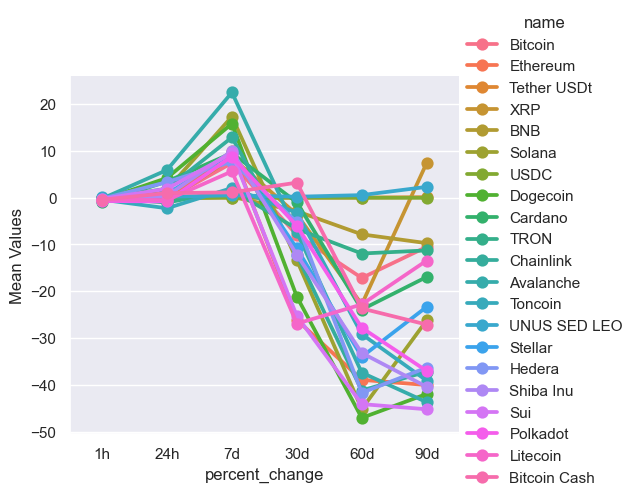

In [187]:
sns.catplot(x = 'percent_change', y = 'Mean Values', hue = 'name', data = df7, kind = 'point')

In [189]:
df8 = df[['name', 'quote.EUR.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.EUR.price,timestamp
0,Bitcoin,81524.34780,2025-03-25 18:20:49.505843


<Axes: xlabel='timestamp', ylabel='quote.EUR.price'>

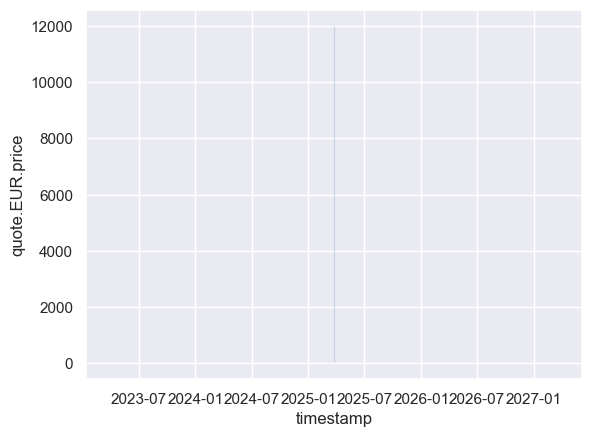

In [153]:
sns.set_theme(style = "darkgrid")

sns.lineplot(x = 'timestamp', y = 'quote.EUR.price', data = df8)